# Decision Tree Regression

In [1]:
import pandas as pd
import sqlalchemy 
pd.options.mode.chained_assignment = None

# First we're going to import the database
db = "raw2017.db"
table = "statcast"

engine = sqlalchemy.create_engine("sqlite:///%s" % db, execution_options={"sqlite_raw_colnames": True})
data = pd.read_sql_table(table, engine)
data

,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,pitcher_name,batter,pitcher,events,...,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
0,5,FF,2017-06-04,99.0,-1.9254,6.1656,Archie Bradley,454560,605151,single,...,54.2291,0.821,0.775,0.9,1.0,1.0,0.0,4.0,69,14
1,8,FF,2017-07-28,98.9,-1.3750,5.7879,Rubby De La Rosa,576397,523989,single,...,54.3663,0.845,0.811,0.9,1.0,1.0,0.0,4.0,43,5
2,10,FF,2017-05-23,98.8,-1.8196,5.9336,Archie Bradley,570560,605151,field_out,...,54.2932,0.480,0.496,0.0,1.0,0.0,0.0,4.0,51,7
3,16,FF,2017-09-22,98.6,-1.7802,5.8579,Archie Bradley,571506,605151,field_out,...,54.1173,0.053,0.049,0.0,1.0,0.0,0.0,2.0,79,3
4,26,FF,2017-05-23,98.4,-1.8751,5.9560,Archie Bradley,641313,605151,force_out,...,54.4381,0.080,0.073,0.0,1.0,0.0,0.0,2.0,52,2
5,31,FF,2017-09-06,98.4,-1.7081,6.0757,Archie Bradley,621035,605151,field_out,...,54.2580,0.282,0.256,0.0,1.0,0.0,0.0,2.0,64,5
6,50,FF,2017-07-14,98.1,-1.6362,5.5172,Archie Bradley,518692,605151,single,...,54.1717,0.527,0.493,0.9,1.0,1.0,0.0,4.0,66,2
7,51,FF,2017-09-22,98.1,-1.6273,5.8014,Archie Bradley,592885,605151,single,...,53.8556,0.451,0.425,0.9,1.0,1.0,0.0,4.0,77,4
8,60,FF,2017-08-08,98.1,-1.9149,5.7952,Archie Bradley,641355,605151,field_out,...,54.4450,0.016,0.022,0.0,1.0,0.0,0.0,3.0,64,3
9,64,FF,2017-08-01,98.0,-1.6200,5.9815,Rubby De La Rosa,519203,523989,home_run,...,54.2478,0.783,1.508,2.0,1.0,0.0,3.0,6.0,70,3


In [2]:
data.head()

,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,pitcher_name,batter,pitcher,events,...,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
0,5,FF,2017-06-04,99.0,-1.9254,6.1656,Archie Bradley,454560,605151,single,...,54.2291,0.821,0.775,0.9,1.0,1.0,0.0,4.0,69,14
1,8,FF,2017-07-28,98.9,-1.3750,5.7879,Rubby De La Rosa,576397,523989,single,...,54.3663,0.845,0.811,0.9,1.0,1.0,0.0,4.0,43,5
2,10,FF,2017-05-23,98.8,-1.8196,5.9336,Archie Bradley,570560,605151,field_out,...,54.2932,0.480,0.496,0.0,1.0,0.0,0.0,4.0,51,7
3,16,FF,2017-09-22,98.6,-1.7802,5.8579,Archie Bradley,571506,605151,field_out,...,54.1173,0.053,0.049,0.0,1.0,0.0,0.0,2.0,79,3
4,26,FF,2017-05-23,98.4,-1.8751,5.9560,Archie Bradley,641313,605151,force_out,...,54.4381,0.080,0.073,0.0,1.0,0.0,0.0,2.0,52,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99421 entries, 0 to 99420
Data columns (total 79 columns):
index                              99421 non-null int64
pitch_type                         99402 non-null object
game_date                          99421 non-null object
release_speed                      99421 non-null float64
release_pos_x                      99400 non-null float64
release_pos_z                      99400 non-null float64
pitcher_name                       99421 non-null object
batter                             99421 non-null int64
pitcher                            99421 non-null int64
events                             99421 non-null object
description                        99421 non-null object
spin_dir                           0 non-null float64
spin_rate_deprecated               0 non-null float64
break_angle_deprecated             0 non-null float64
break_length_deprecated            0 non-null float64
zone                               99392 non-nul

In [4]:
data['events'].value_counts()

field_out                    74056
home_run                      6182
single                        5388
grounded_into_double_play     3840
force_out                     3700
double                        2756
sac_fly                       1152
sac_bunt                       896
double_play                    426
triple                         349
fielders_choice_out            312
field_error                    264
fielders_choice                 68
sac_fly_double_play             22
triple_play                      7
catcher_interf                   3
Name: events, dtype: int64

In [5]:
data['description'].value_counts()

hit_into_play          82690
hit_into_play_score    16731
Name: description, dtype: int64

In [6]:
data.describe()

,index,release_speed,release_pos_x,release_pos_z,batter,pitcher,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,...,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
count,99421.000000,99421.000000,99400.000000,99400.000000,99421.000000,99421.000000,0.0,0.0,0.0,0.0,...,99400.000000,99421.000000,99421.000000,99421.000000,99421.0,99421.000000,99421.000000,99418.000000,99421.000000,99421.000000
mean,12045.399403,88.796999,-0.871389,5.889039,528104.213164,533516.014705,NaN,NaN,NaN,NaN,...,54.467118,0.251582,0.304317,0.213402,1.0,0.085425,0.221281,2.985033,38.920681,3.401585
std,6893.319980,5.849540,1.917677,0.482597,74676.875534,76846.957511,NaN,NaN,NaN,NaN,...,0.521598,0.261170,0.382625,0.547156,0.0,0.279514,0.743251,1.261513,22.789181,1.837363
min,0.000000,42.400000,-5.341200,0.006800,112526.000000,112526.000000,NaN,NaN,NaN,NaN,...,28.578700,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,1.000000,1.000000
25%,6178.000000,84.800000,-2.217325,5.620375,460086.000000,474699.000000,NaN,NaN,NaN,NaN,...,54.117700,0.055000,0.056000,0.000000,1.0,0.000000,0.000000,2.000000,20.000000,2.000000
50%,11925.000000,90.200000,-1.568300,5.936500,542454.000000,543144.000000,NaN,NaN,NaN,NaN,...,54.461600,0.138000,0.133000,0.000000,1.0,0.000000,0.000000,3.000000,38.000000,3.000000
75%,17902.000000,93.200000,0.628025,6.205700,592696.000000,595918.000000,NaN,NaN,NaN,NaN,...,54.815000,0.414000,0.443000,0.000000,1.0,0.000000,0.000000,4.000000,57.000000,5.000000
max,26658.000000,103.200000,5.728000,8.607500,669720.000000,664701.000000,NaN,NaN,NaN,NaN,...,58.360800,0.997000,1.985000,2.000000,1.0,1.000000,3.000000,6.000000,142.000000,15.000000


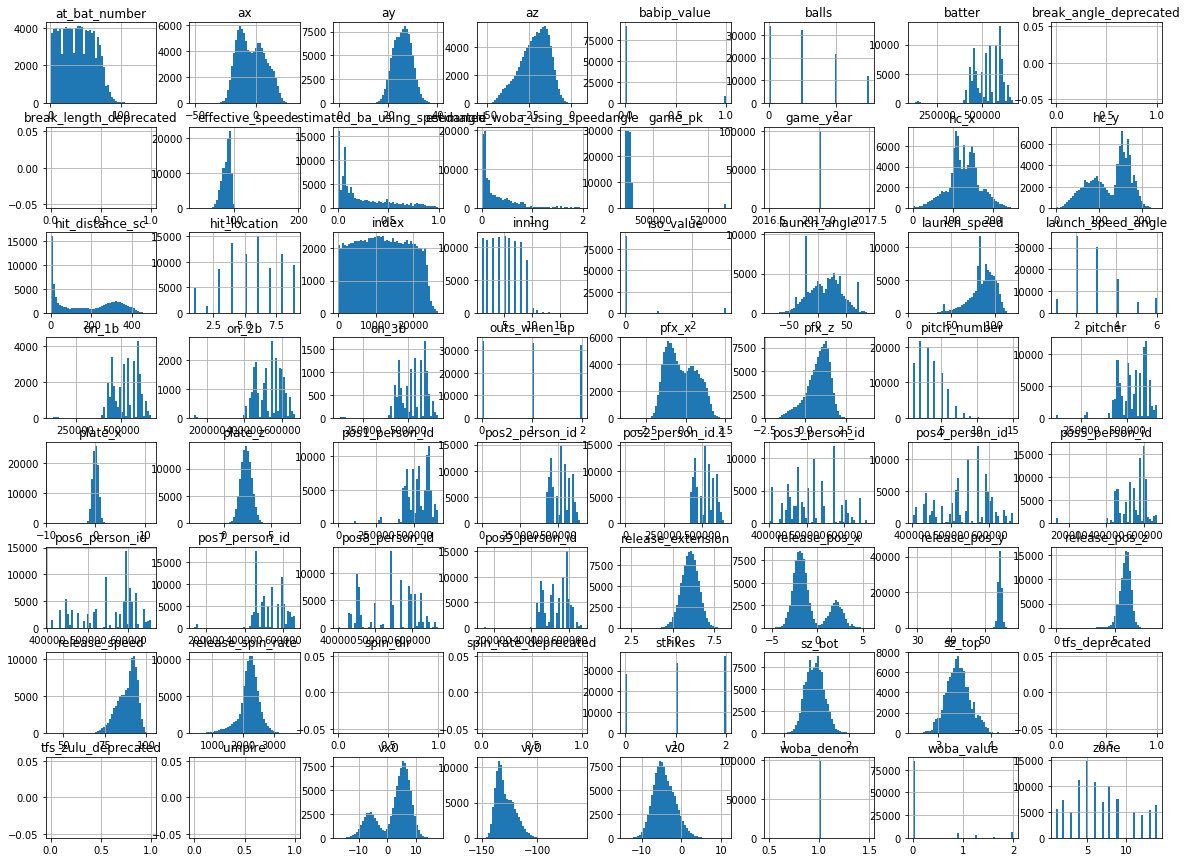

In [7]:
# Plot every numerical value to see if anything can be cleaned
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20, 15))
plt.show()

In [8]:
# Remove irrelevant features
del data['des']
del data['at_bat_number']
del data['pitch_number']
data = data[[col for col in data.columns if 'deprecated' not in col]]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99421 entries, 0 to 99420
Data columns (total 71 columns):
index                              99421 non-null int64
pitch_type                         99402 non-null object
game_date                          99421 non-null object
release_speed                      99421 non-null float64
release_pos_x                      99400 non-null float64
release_pos_z                      99400 non-null float64
pitcher_name                       99421 non-null object
batter                             99421 non-null int64
pitcher                            99421 non-null int64
events                             99421 non-null object
description                        99421 non-null object
spin_dir                           0 non-null float64
zone                               99392 non-null float64
game_type                          99421 non-null object
stand                              99421 non-null object
p_throws                           994

In [9]:
del data['spin_dir']
del data['umpire']

data['game_type'].value_counts()

R    97975
D      624
L      442
W      297
F       83
Name: game_type, dtype: int64

In [10]:
data['stand'].value_counts()

R    58579
L    40842
Name: stand, dtype: int64

In [11]:
data['type'].value_counts()

X    99418
S        3
Name: type, dtype: int64

In [12]:
del data['type']  # We don't know what this feature is, but they're almost all 'X' so it's irrelevant
data['bb_type'].value_counts()


ground_ball    45678
fly_ball       26916
line_drive     17821
popup           9003
Name: bb_type, dtype: int64

In [13]:
data['game_year'].value_counts()

2017    99421
Name: game_year, dtype: int64

In [14]:
del data['game_year']
del data['pos2_person_id.1']  # This is a duplicate
data['game_pk'].value_counts()

492262    78
490236    78
490627    74
492176    73
490678    70
490857    66
492298    66
491428    65
491506    65
490568    64
491456    64
490404    62
491542    62
490570    61
490526    60
490889    60
491072    59
492237    59
491960    59
491195    58
490401    58
492146    58
490680    57
491591    57
490133    57
490541    57
490693    56
490349    56
490744    56
490928    56
          ..
490817    28
490124    28
491592    28
490369    28
491729    28
490267    28
526477    28
491378    28
490325    28
491008    28
490274    28
490766    28
491363    27
490285    27
492381    27
490154    27
490221    27
490757    27
492458    27
490538    26
492516    26
526481    26
526479    26
490581    26
491838    26
490839    25
490813    23
492498    23
492117    22
490335     8
Name: game_pk, Length: 2466, dtype: int64

In [15]:
del data['game_pk']  # This is just a game ID
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99421 entries, 0 to 99420
Data columns (total 65 columns):
index                              99421 non-null int64
pitch_type                         99402 non-null object
game_date                          99421 non-null object
release_speed                      99421 non-null float64
release_pos_x                      99400 non-null float64
release_pos_z                      99400 non-null float64
pitcher_name                       99421 non-null object
batter                             99421 non-null int64
pitcher                            99421 non-null int64
events                             99421 non-null object
description                        99421 non-null object
zone                               99392 non-null float64
game_type                          99421 non-null object
stand                              99421 non-null object
p_throws                           99421 non-null object
home_team                          

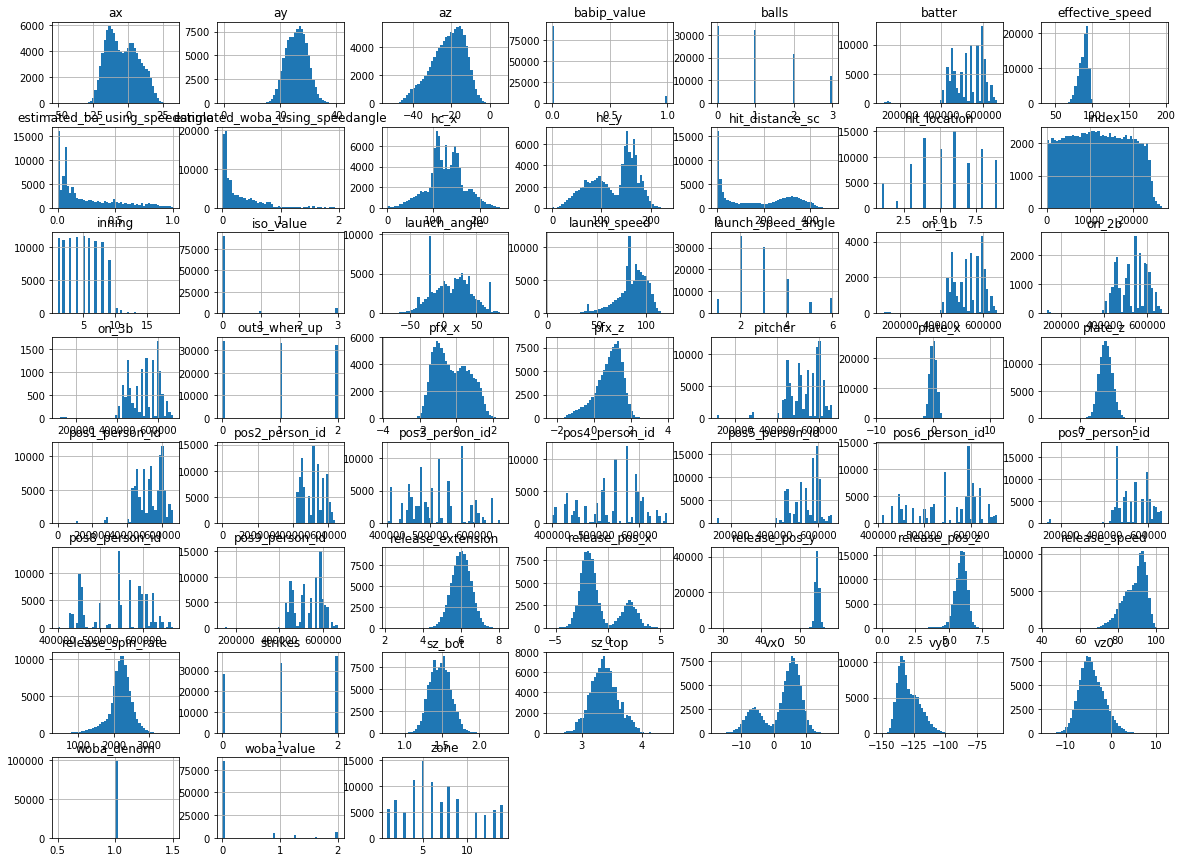

In [16]:
# We can try combining some features in the future to see how the model performs
# So now we will plot the numerical values again and see if there are any we can scale
data.hist(bins=50, figsize=(20, 15))
plt.show()

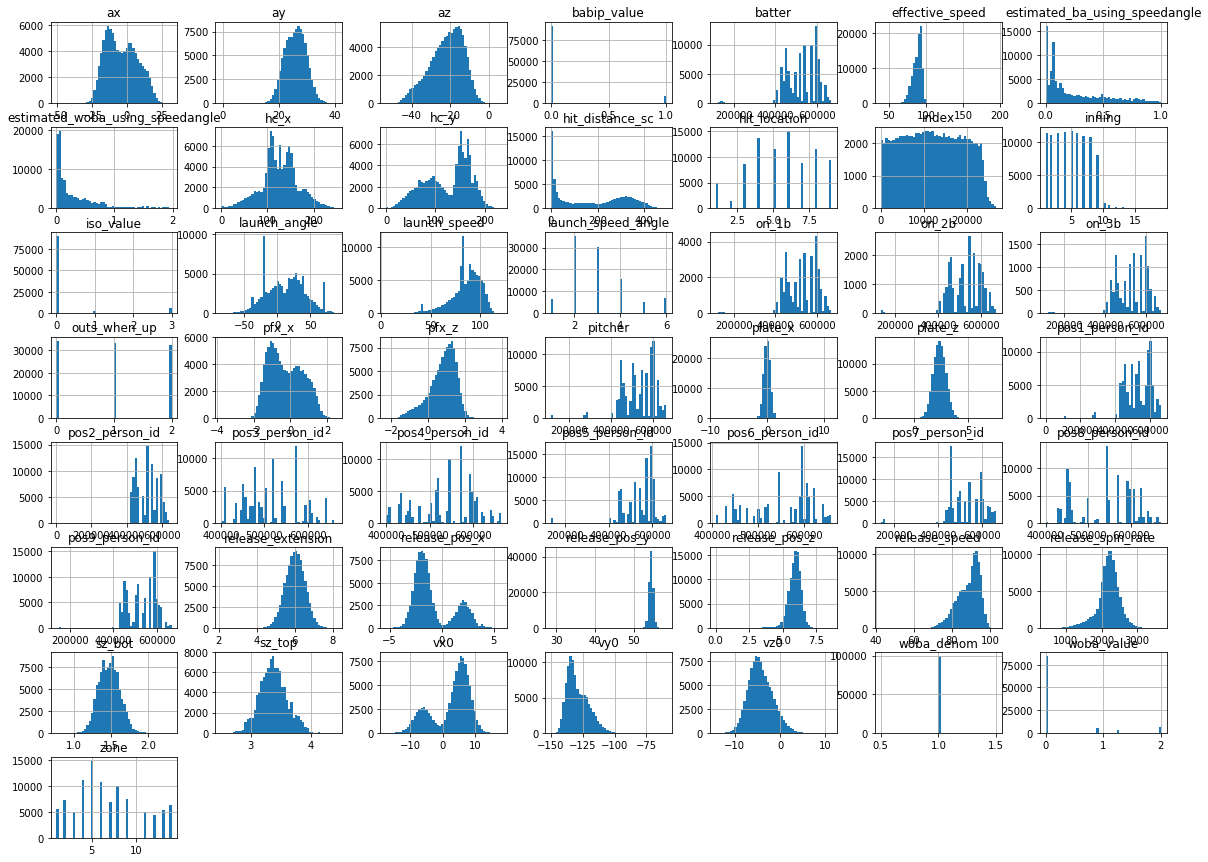

In [17]:
# We're going to make balls and strikes discrete so the algorithm doesn't define a threshold 
# that will lose a lot of information
data['balls'] = data['balls'].astype(str)
data['strikes'] = data['strikes'].astype(str)
data.hist(bins=50, figsize=(20, 15))
plt.show()

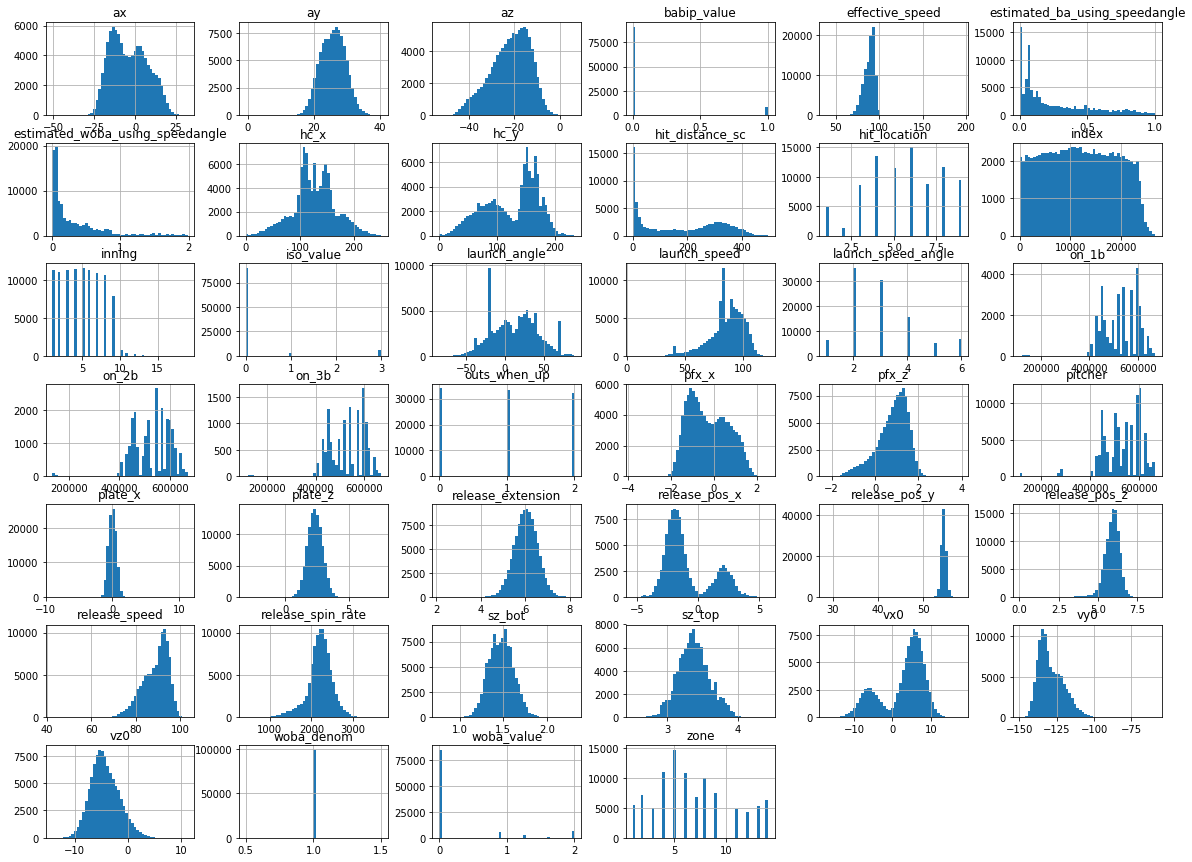

In [18]:
# We'll also set all ID values to strings so they function as discrete "names"
data['batter'] = data['batter'].astype(str)
for feature in [col for col in data.columns if col.endswith('id')]:
    data[feature] = data[feature].astype(str)
data.hist(bins=50, figsize=(20, 15))
plt.show()

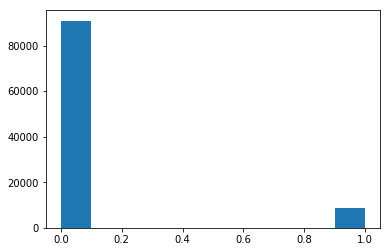

In [19]:
plt.hist(data['babip_value'])
plt.show()

In [20]:
data['babip_value'].value_counts()

0.0    90928
1.0     8493
Name: babip_value, dtype: int64

In [21]:
# BABIP (Batting Average on Balls In Play) is an important stat, but it appears we extracted it wrong
# so we'll drop it for now
# TODO Extract BABIP correctly
del data['babip_value']

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99421 entries, 0 to 99420
Data columns (total 64 columns):
index                              99421 non-null int64
pitch_type                         99402 non-null object
game_date                          99421 non-null object
release_speed                      99421 non-null float64
release_pos_x                      99400 non-null float64
release_pos_z                      99400 non-null float64
pitcher_name                       99421 non-null object
batter                             99421 non-null object
pitcher                            99421 non-null int64
events                             99421 non-null object
description                        99421 non-null object
zone                               99392 non-null float64
game_type                          99421 non-null object
stand                              99421 non-null object
p_throws                           99421 non-null object
home_team                         

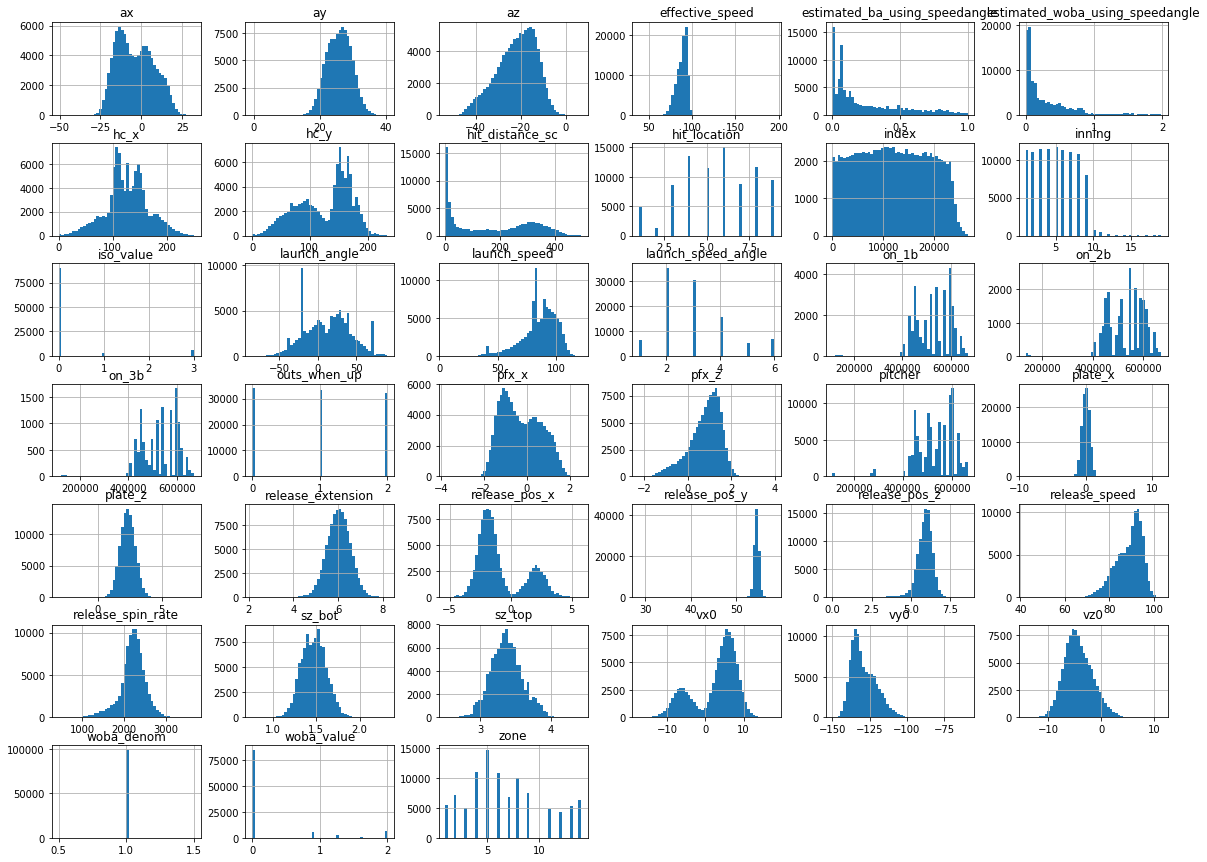

In [23]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 7.000e+00, 2.900e+01,
        9.900e+01, 3.310e+02, 8.330e+02, 1.660e+03, 2.924e+03, 4.051e+03,
        5.345e+03, 6.150e+03, 6.401e+03, 6.187e+03, 5.683e+03, 4.895e+03,
        4.348e+03, 4.127e+03, 4.349e+03, 4.572e+03, 5.007e+03, 5.053e+03,
        4.619e+03, 4.089e+03, 3.600e+03, 3.325e+03, 3.013e+03, 2.748e+03,
        2.435e+03, 1.678e+03, 9.710e+02, 5.070e+02, 2.120e+02, 8.000e+01,
        3.800e+01, 1.500e+01, 7.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00]),
 array([-50. , -48.2, -46.4, -44.6, -42.8, -41. , -39.2, -37.4, -35.6,
        -33.8, -32. , -30.2, -28.4, -26.6, -24.8, -23. , -21.2, -19.4,
        -17.6, -15.8, -14. , -12.2, -10.4,  -8.6,  -6.8,  -5. ,  -3.2,
         -1.4,   0.4,   2.2,   4. ,   5.8,   7.6,   9.4,  11.2,  13. ,
         14.8,  16.6,  18.4,  20.2,  22. ,  23.8,  25.6,  27.4,  29.2,
         31. ,  32.8,

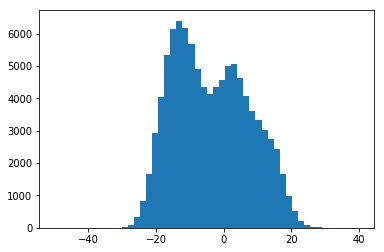

In [24]:
import numpy as np
ax = np.array(data['ax'])
plt.hist(ax, bins=50, range=(-50, 40))

/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([    0.,     0.,     0.,     0.,     0.,  4943.,     0.,     0.,
            0.,     0.,  1360.,     0.,     0.,     0.,     0.,  8604.,
            0.,     0.,     0.,     0., 13627.,     0.,     0.,     0.,
            0., 11492.,     0.,     0.,     0.,     0., 15036.,     0.,
            0.,     0.,     0.,  8814.,     0.,     0.,     0.,     0.,
        11605.,     0.,     0.,     0.,     0.,  9434.,     0.,     0.,
            0.,     0.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
         2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
         4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
         6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
         8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. ]),
 <a list of 50 Patch objects>)

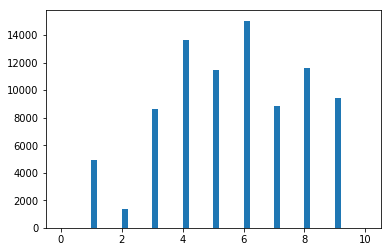

In [25]:
plt.hist(data['hit_location'], bins=50, range=(0, 10))

In [26]:
data['hit_location'].value_counts()

6.0    15036
4.0    13627
8.0    11605
5.0    11492
9.0     9434
7.0     8814
3.0     8604
1.0     4943
2.0     1360
Name: hit_location, dtype: int64

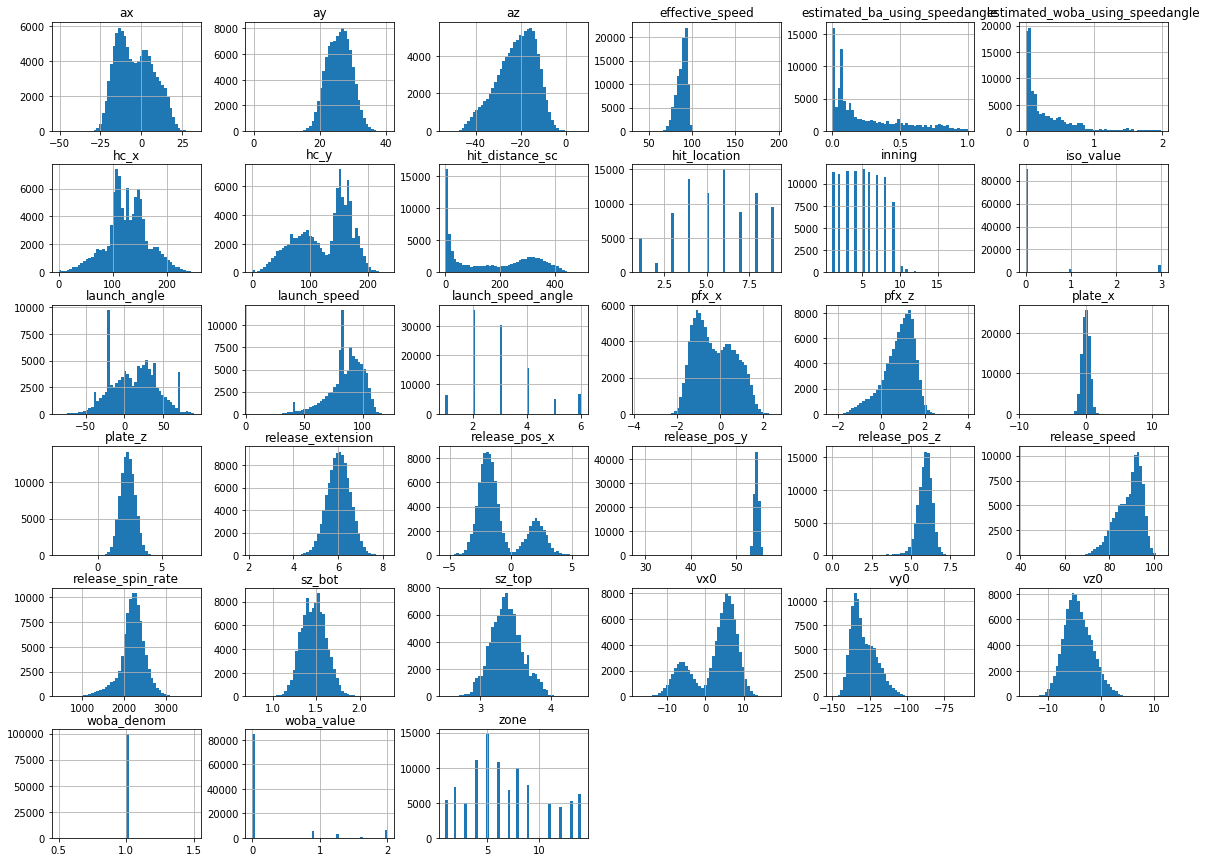

In [27]:
# TODO try models with hit_location and innings (and any other stats with similar distributions) as 
# both discrete and continuous attributes
# TODO discuss how to normalize features
del data['index']

# Discretize runners on base as well as outs_when_up, pitcher
for feature in [col for col in data.columns if col.startswith('on')] + ['outs_when_up', 'pitcher']:
    data[feature] = data[feature].astype(str)
data.hist(bins=50, figsize=(20, 15))
plt.show()

(array([90134.,     0.,     0.,  2756.,     0.,     0.,   349.,     0.,
            0.,  6182.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

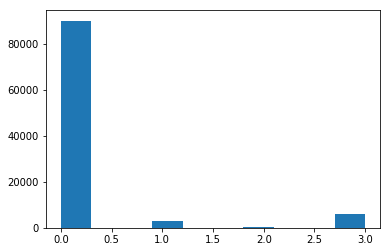

In [28]:
plt.hist(data['iso_value'])

(array([90134.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
         2756.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   349.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  6182.]),
 array([0.  , 0.06, 0.12, 0.18, 0.24, 0.3 , 0.36, 0.42, 0.48, 0.54, 0.6 ,
        0.66, 0.72, 0.78, 0.84, 0.9 , 0.96, 1.02, 1.08, 1.14, 1.2 , 1.26,
        1.32, 1.38, 1.44, 1.5 , 1.56, 1.62, 1.68, 1.74, 1.8 , 1.86, 1.92,
        1.98, 2.04, 2.1 , 2.16, 2.22, 2.28, 2.34, 2.4 , 2.46, 2.52, 2.58,
        2.64, 2.7 , 2.76, 2.82, 2.88, 2.94, 3.  ]),
 <a list of 50 Patch objects>)

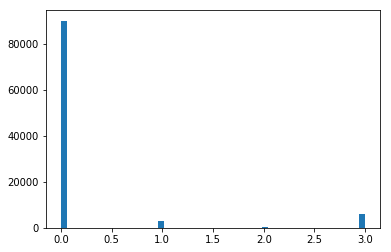

In [29]:
plt.hist(data['iso_value'], bins=50)

/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 5445., 12155., 25876., 17678., 17463.,  4889.,  9611.,  6275.,
            0.,     0.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

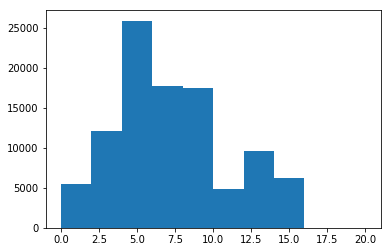

In [30]:
# TODO properly collect ISO and WOBA values
del data['iso_value']
del data['woba_denom']
del data['woba_value']

plt.hist(data['zone'], range=(0, 20))

In [31]:
data['zone'].value_counts()

5.0     14777
4.0     11099
6.0     10818
8.0      9957
9.0      7506
2.0      7195
7.0      6860
14.0     6275
1.0      5445
13.0     5261
3.0      4960
11.0     4889
12.0     4350
Name: zone, dtype: int64

In [32]:
# TODO figure out what zone is and how to work with it
# We will have to clean the data a little better, but for now, let's make a model
data['events'].value_counts()

field_out                    74056
home_run                      6182
single                        5388
grounded_into_double_play     3840
force_out                     3700
double                        2756
sac_fly                       1152
sac_bunt                       896
double_play                    426
triple                         349
fielders_choice_out            312
field_error                    264
fielders_choice                 68
sac_fly_double_play             22
triple_play                      7
catcher_interf                   3
Name: events, dtype: int64

In [33]:
hit_types = {'single', 'double', 'triple', 'home_run'}
labels = ['hit' if event in hit_types else 'not_hit' for event in data['events']]
del data['events']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b8e839710>,
      dtype=object)

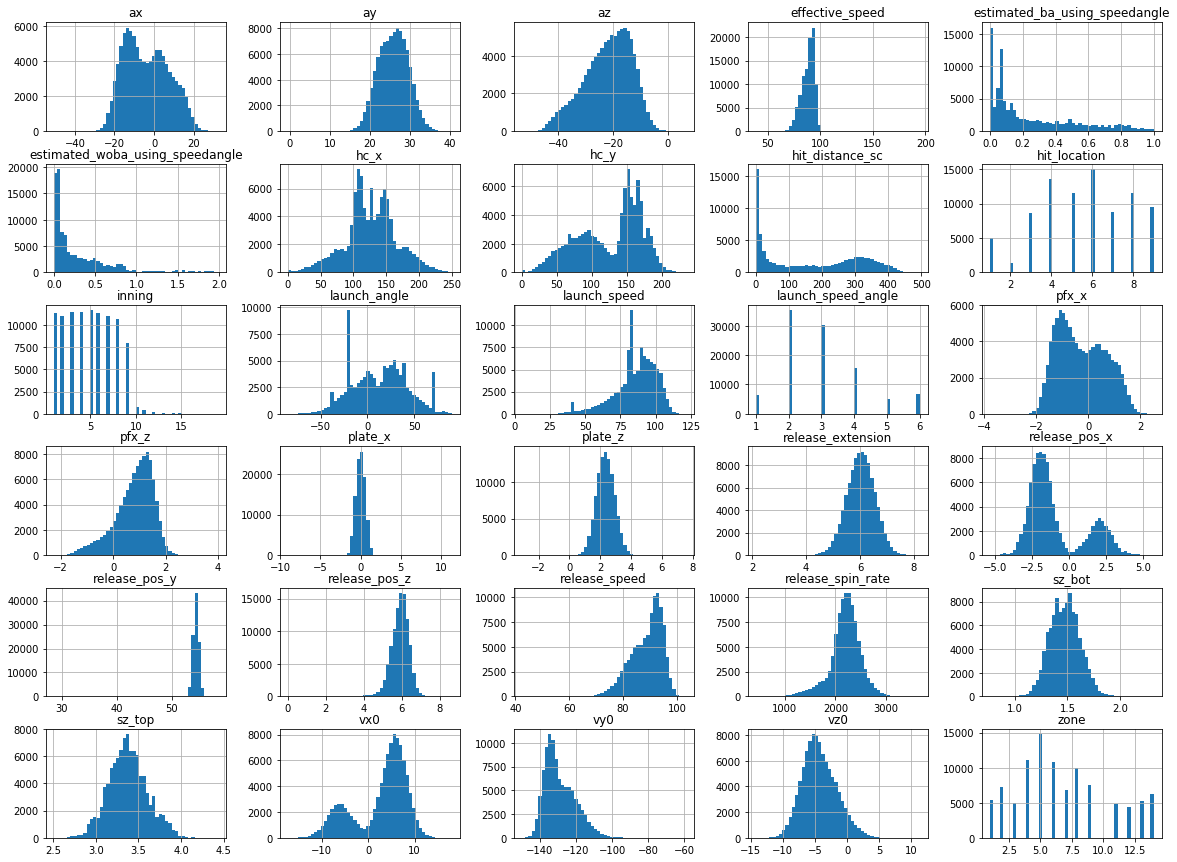

In [34]:
data.hist(bins=50, figsize=(20, 15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b84b784a8>,
      dtype=object)

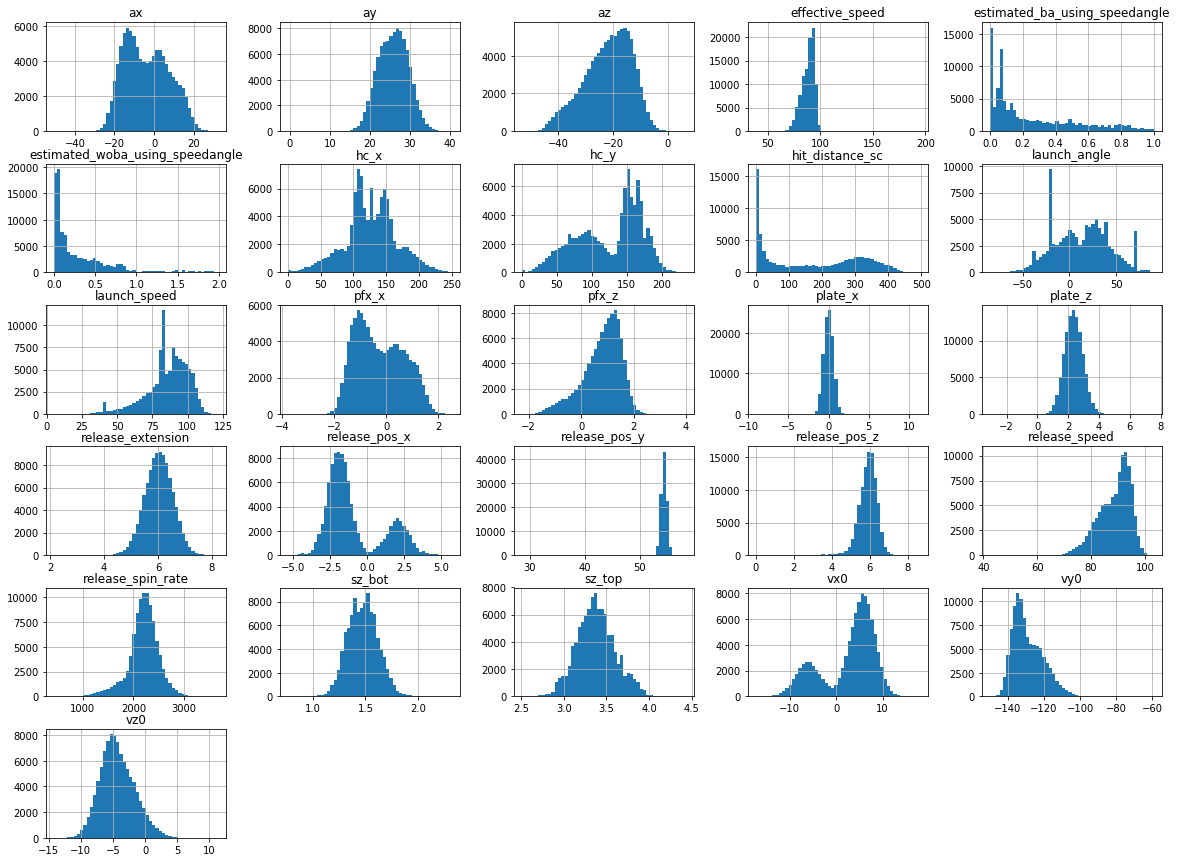

In [35]:
# Further discretization
data['hit_location'] = data['hit_location'].astype(str)
data['inning'] = data['inning'].astype(str)
del data['launch_speed_angle']  # This data appears broken, plus we have it elsewhere
del data['zone']                # We're not sure what this is lmao
data.hist(bins=50, figsize=(20, 15))

In [39]:
# We will normalize the data later, but for now, we need to impute missing values
incomplete_rows = data[data.isnull().any(axis=1)].head()
incomplete_rows

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,pitcher_name,batter,pitcher,description,game_type,...,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle
2,FF,2017-05-23,98.8,-1.8196,5.9336,Archie Bradley,570560,605151,hit_into_play,R,...,502671.0,592273.0,571875.0,605113.0,630111.0,571681.0,444482.0,54.2932,0.480,0.496
8,FF,2017-08-08,98.1,-1.9149,5.7952,Archie Bradley,641355,605151,hit_into_play,R,...,nan,nan,nan,nan,nan,nan,nan,54.4450,0.016,0.022
9,FF,2017-08-01,98.0,-1.6200,5.9815,Rubby De La Rosa,519203,523989,hit_into_play_score,R,...,nan,nan,nan,nan,nan,nan,nan,54.2478,0.783,1.508
12,FF,2017-10-07,97.7,-1.5976,5.8908,Archie Bradley,457759,605151,hit_into_play,D,...,502671.0,518614.0,571875.0,606466.0,444482.0,572041.0,502110.0,54.1553,0.000,0.001
35,FF,2017-08-14,97.2,-1.9503,5.9987,Archie Bradley,543807,605151,hit_into_play,R,...,nan,nan,nan,nan,nan,nan,nan,54.2603,0.480,0.496


In [40]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')
# Remove non-numerical features so median can be calculated
# Finna fill those empties with the median
data_num = data._get_numeric_data()
data_num

,release_speed,release_pos_x,release_pos_z,pfx_x,pfx_z,plate_x,plate_z,hc_x,hc_y,vx0,...,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle
0,99.0,-1.9254,6.1656,-0.4564,2.1354,-0.1520,3.5313,99.60,98.49,5.8761,...,1.4320,221.0,87.4,11.591,98.486,2369.0,6.2690,54.2291,0.821,0.775
1,98.9,-1.3750,5.7879,-1.0093,1.2506,0.7117,2.0380,130.79,85.79,7.9479,...,1.1757,235.0,91.3,14.058,97.739,2419.0,6.1310,54.3663,0.845,0.811
2,98.8,-1.8196,5.9336,-1.4037,0.8147,0.5285,1.6160,118.56,77.56,9.5880,...,1.6000,NaN,91.1,18.199,98.937,2431.0,6.2060,54.2932,0.480,0.496
3,98.6,-1.7802,5.8579,-1.3387,0.9246,-1.4091,2.7768,119.82,159.18,4.1065,...,1.5533,4.0,78.9,-33.094,98.686,2341.0,6.3820,54.1173,0.053,0.049
4,98.4,-1.8751,5.9560,-1.3003,0.9443,-0.5596,2.3431,107.43,162.58,6.4915,...,1.5000,3.0,63.6,-39.928,98.227,2380.0,6.0610,54.4381,0.080,0.073
5,98.4,-1.7081,6.0757,-0.2217,1.8251,0.7325,2.2106,129.90,183.89,7.0952,...,1.4458,8.0,105.6,-14.892,98.126,2287.0,6.2430,54.2580,0.282,0.256
6,98.1,-1.6362,5.5172,-1.1280,0.8640,0.6269,2.9370,101.55,129.11,8.7061,...,1.5627,99.0,89.4,6.577,98.794,2388.0,6.3300,54.1717,0.527,0.493
7,98.1,-1.6273,5.8014,-0.5360,1.1595,0.8798,2.7404,145.17,84.16,8.0680,...,1.4482,85.0,87.6,4.670,99.068,2367.0,6.6440,53.8556,0.451,0.425
8,98.1,-1.9149,5.7952,-0.7150,0.6888,0.2178,3.3584,119.20,56.98,7.3436,...,1.2463,NaN,89.0,39.000,NaN,2490.0,6.0550,54.4450,0.016,0.022
9,98.0,-1.6200,5.9815,-1.1217,1.4152,0.0764,2.4759,117.18,25.54,7.1251,...,1.4986,NaN,103.0,30.000,NaN,2457.0,6.2563,54.2478,0.783,1.508


In [41]:
X = imputer.fit_transform(data_num)
X

array([[ 9.90000e+01, -1.92540e+00,  6.16560e+00, ...,  5.42291e+01,
         8.21000e-01,  7.75000e-01],
       [ 9.89000e+01, -1.37500e+00,  5.78790e+00, ...,  5.43663e+01,
         8.45000e-01,  8.11000e-01],
       [ 9.88000e+01, -1.81960e+00,  5.93360e+00, ...,  5.42932e+01,
         4.80000e-01,  4.96000e-01],
       ...,
       [ 7.17000e+01,  2.00570e+00,  5.37980e+00, ...,  5.51566e+01,
         2.40000e-01,  2.24000e-01],
       [ 7.13000e+01,  2.12640e+00,  5.83990e+00, ...,  5.47612e+01,
         2.95000e-01,  2.77000e-01],
       [ 6.97000e+01,  1.96380e+00,  5.94650e+00, ...,  5.47414e+01,
         5.40000e-02,  5.00000e-02]])

In [42]:
data_tr = pd.DataFrame(X, columns=data_num.columns)
data_tr

,release_speed,release_pos_x,release_pos_z,pfx_x,pfx_z,plate_x,plate_z,hc_x,hc_y,vx0,...,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle
0,99.0,-1.9254,6.1656,-0.4564,2.1354,-0.1520,3.5313,99.60,98.49,5.8761,...,1.4320,221.0,87.4,11.591,98.486,2369.0,6.2690,54.2291,0.821,0.775
1,98.9,-1.3750,5.7879,-1.0093,1.2506,0.7117,2.0380,130.79,85.79,7.9479,...,1.1757,235.0,91.3,14.058,97.739,2419.0,6.1310,54.3663,0.845,0.811
2,98.8,-1.8196,5.9336,-1.4037,0.8147,0.5285,1.6160,118.56,77.56,9.5880,...,1.6000,164.0,91.1,18.199,98.937,2431.0,6.2060,54.2932,0.480,0.496
3,98.6,-1.7802,5.8579,-1.3387,0.9246,-1.4091,2.7768,119.82,159.18,4.1065,...,1.5533,4.0,78.9,-33.094,98.686,2341.0,6.3820,54.1173,0.053,0.049
4,98.4,-1.8751,5.9560,-1.3003,0.9443,-0.5596,2.3431,107.43,162.58,6.4915,...,1.5000,3.0,63.6,-39.928,98.227,2380.0,6.0610,54.4381,0.080,0.073
5,98.4,-1.7081,6.0757,-0.2217,1.8251,0.7325,2.2106,129.90,183.89,7.0952,...,1.4458,8.0,105.6,-14.892,98.126,2287.0,6.2430,54.2580,0.282,0.256
6,98.1,-1.6362,5.5172,-1.1280,0.8640,0.6269,2.9370,101.55,129.11,8.7061,...,1.5627,99.0,89.4,6.577,98.794,2388.0,6.3300,54.1717,0.527,0.493
7,98.1,-1.6273,5.8014,-0.5360,1.1595,0.8798,2.7404,145.17,84.16,8.0680,...,1.4482,85.0,87.6,4.670,99.068,2367.0,6.6440,53.8556,0.451,0.425
8,98.1,-1.9149,5.7952,-0.7150,0.6888,0.2178,3.3584,119.20,56.98,7.3436,...,1.2463,164.0,89.0,39.000,89.710,2490.0,6.0550,54.4450,0.016,0.022
9,98.0,-1.6200,5.9815,-1.1217,1.4152,0.0764,2.4759,117.18,25.54,7.1251,...,1.4986,164.0,103.0,30.000,89.710,2457.0,6.2563,54.2478,0.783,1.508


In [43]:
data

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,pitcher_name,batter,pitcher,description,game_type,...,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle
0,FF,2017-06-04,99.0,-1.9254,6.1656,Archie Bradley,454560,605151,hit_into_play_score,R,...,502671.0,518614.0,571875.0,605113.0,543302.0,571681.0,444482.0,54.2291,0.821,0.775
1,FF,2017-07-28,98.9,-1.3750,5.7879,Rubby De La Rosa,576397,523989,hit_into_play_score,R,...,502671.0,592273.0,518614.0,572008.0,444482.0,572041.0,502110.0,54.3663,0.845,0.811
2,FF,2017-05-23,98.8,-1.8196,5.9336,Archie Bradley,570560,605151,hit_into_play,R,...,502671.0,592273.0,571875.0,605113.0,630111.0,571681.0,444482.0,54.2932,0.480,0.496
3,FF,2017-09-22,98.6,-1.7802,5.8579,Archie Bradley,571506,605151,hit_into_play,R,...,502671.0,518614.0,571875.0,606466.0,444482.0,572041.0,502110.0,54.1173,0.053,0.049
4,FF,2017-05-23,98.4,-1.8751,5.9560,Archie Bradley,641313,605151,hit_into_play,R,...,502671.0,592273.0,571875.0,605113.0,630111.0,571681.0,444482.0,54.4381,0.080,0.073
5,FF,2017-09-06,98.4,-1.7081,6.0757,Archie Bradley,621035,605151,hit_into_play,R,...,518614.0,592273.0,571875.0,606466.0,444482.0,572041.0,502110.0,54.2580,0.282,0.256
6,FF,2017-07-14,98.1,-1.6362,5.5172,Archie Bradley,518692,605151,hit_into_play_score,R,...,502671.0,592273.0,571875.0,572008.0,453923.0,572041.0,444482.0,54.1717,0.527,0.493
7,FF,2017-09-22,98.1,-1.6273,5.8014,Archie Bradley,592885,605151,hit_into_play_score,R,...,502671.0,518614.0,571875.0,606466.0,444482.0,572041.0,502110.0,53.8556,0.451,0.425
8,FF,2017-08-08,98.1,-1.9149,5.7952,Archie Bradley,641355,605151,hit_into_play,R,...,nan,nan,nan,nan,nan,nan,nan,54.4450,0.016,0.022
9,FF,2017-08-01,98.0,-1.6200,5.9815,Rubby De La Rosa,519203,523989,hit_into_play_score,R,...,nan,nan,nan,nan,nan,nan,nan,54.2478,0.783,1.508


In [44]:
continuous_attrs = set(data_num.columns)
discrete_attrs = set([attr for attr in data.columns if attr not in continuous_attrs])
discrete_attrs

{'away_team',
 'balls',
 'batter',
 'bb_type',
 'description',
 'game_date',
 'game_type',
 'hit_location',
 'home_team',
 'inning',
 'inning_topbot',
 'on_1b',
 'on_2b',
 'on_3b',
 'outs_when_up',
 'p_throws',
 'pitch_type',
 'pitcher',
 'pitcher_name',
 'pos1_person_id',
 'pos2_person_id',
 'pos3_person_id',
 'pos4_person_id',
 'pos5_person_id',
 'pos6_person_id',
 'pos7_person_id',
 'pos8_person_id',
 'pos9_person_id',
 'stand',
 'strikes',
 'sv_id'}

In [45]:
data['away_team']

0        ARI
1        ARI
2        CWS
3        MIA
4        CWS
5        ARI
6        ARI
7        MIA
8        LAD
9        ARI
10        SF
11       CWS
12       ARI
13        SF
14       PHI
15       STL
16       CIN
17       ARI
18       COL
19       COL
20       ARI
21       STL
22       ARI
23       LAD
24       CIN
25        SF
26       ARI
27       LAD
28       NYM
29       ARI
        ... 
99391    WSH
99392    WSH
99393    WSH
99394    WSH
99395    WSH
99396    STL
99397    CIN
99398    TEX
99399    MIA
99400    WSH
99401    WSH
99402    TEX
99403    WSH
99404    WSH
99405    CHC
99406    WSH
99407    ATL
99408    WSH
99409    ARI
99410    WSH
99411    NYM
99412    NYM
99413    MIL
99414    WSH
99415    WSH
99416    ATL
99417    MIA
99418    WSH
99419    NYM
99420    PIT
Name: away_team, Length: 99421, dtype: object

In [47]:
discrete_attrs = list(discrete_attrs)
data[discrete_attrs]

,inning,pitcher,pos8_person_id,home_team,description,game_date,on_2b,pos7_person_id,outs_when_up,pos2_person_id,...,pos4_person_id,pos5_person_id,pos9_person_id,strikes,pos6_person_id,hit_location,balls,pos3_person_id,p_throws,bb_type
0,7,605151,571681.0,MIA,hit_into_play_score,2017-06-04,518618.0,543302.0,2,455104.0,...,518614.0,571875.0,444482.0,2,605113.0,nan,3,502671.0,R,line_drive
1,6,523989,572041.0,STL,hit_into_play_score,2017-07-28,nan,444482.0,1,543302.0,...,592273.0,518614.0,502110.0,2,572008.0,nan,2,502671.0,R,line_drive
2,7,605151,571681.0,ARI,hit_into_play,2017-05-23,nan,630111.0,0,543302.0,...,592273.0,571875.0,444482.0,2,605113.0,8.0,3,502671.0,R,line_drive
3,8,605151,572041.0,ARI,hit_into_play,2017-09-22,nan,444482.0,2,455104.0,...,518614.0,571875.0,502110.0,2,606466.0,6.0,0,502671.0,R,ground_ball
4,7,605151,571681.0,ARI,hit_into_play,2017-05-23,nan,630111.0,1,543302.0,...,592273.0,571875.0,444482.0,1,605113.0,5.0,0,502671.0,R,ground_ball
5,8,605151,572041.0,LAD,hit_into_play,2017-09-06,nan,444482.0,1,455104.0,...,592273.0,571875.0,502110.0,2,606466.0,1.0,1,518614.0,R,ground_ball
6,8,605151,572041.0,ATL,hit_into_play_score,2017-07-14,408252.0,453923.0,0,543302.0,...,592273.0,571875.0,444482.0,1,572008.0,nan,0,502671.0,R,ground_ball
7,8,605151,572041.0,ARI,hit_into_play_score,2017-09-22,nan,444482.0,1,455104.0,...,518614.0,571875.0,502110.0,2,606466.0,nan,1,502671.0,R,ground_ball
8,8,605151,nan,ARI,hit_into_play,2017-08-08,nan,nan,2,nan,...,nan,nan,nan,2,nan,8.0,0,nan,R,fly_ball
9,7,523989,nan,CHC,hit_into_play_score,2017-08-01,nan,nan,0,nan,...,nan,nan,nan,1,nan,nan,1,nan,R,fly_ball


In [48]:
type(data['away_team'])

pandas.core.series.Series

In [49]:
type(data[discrete_attrs])

pandas.core.frame.DataFrame

In [55]:
from utils import CategoricalEncoder
from sklearn.pipeline import FeatureUnion
from utils import DataFrameSelector
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
continuous_attrs = list(continuous_attrs)

# TODO Temporary fix for handling missing discrete values
for attr in discrete_attrs:
    data[attr] = data[attr].astype(str)

continuous_pipeline = Pipeline([
    ('selector', DataFrameSelector(continuous_attrs)), 
    ('imputer', Imputer(strategy='median')), 
    ('std_scaler', StandardScaler())
])

discrete_pipeline = Pipeline([
    ('selector', DataFrameSelector(discrete_attrs)),
    ('cat_encoder', CategoricalEncoder(encoding='onehot-dense'))
])

full_pipeline = FeatureUnion([
    ('c_pipeline', continuous_pipeline), 
    ('d_pipeline', discrete_pipeline)
])

data_prepared = full_pipeline.fit_transform(data)
data_prepared

MemoryError: 

In [37]:
from sklearn.tree import RandomFore
